Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. It brings all features in the same standing, so that one significant number doesn’t impact the ML models just because of their large magnitude.

The most common techniques of feature scaling are Normalization and Standardization.

#### Why scaling is needed?

- Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance.

- Few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.
- Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances

A few examples of algorithms where feature scaling matters are:

- K-nearest neighbors (KNN) with a Euclidean distance measure is sensitive to distances and hence should be scaled for all features to weigh in equally.
- K-Means uses the Euclidean distance measure hence feature scaling matters.
- Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.
- We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven.

Algorithms that do not require normalization/scaling are the ones that depend on rules. They would not be affected by any monotonic transformations(aka scaling) of the variables. Examples  are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.

When to do scaling?

- Rule of thumb we may follow here is, for an algorithm that computes distance or assumes normality, features should be scaled.


#### Load the data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
##magic command that makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window.
%matplotlib inline 

In [23]:
df = pd.DataFrame({'Weight':[23,15,20,21],
                  'Price':[1,3,2,5],
                   'Fruit':['Orange','Apple','Banana','Grape']
                  })
df

,Weight,Price,Fruit
0,23,1,Orange
1,15,3,Apple
2,20,2,Banana
3,21,5,Grape


In [24]:
df.set_index("Fruit",inplace=True)
df

,Weight,Price
Fruit,,
Orange,23,1
Apple,15,3
Banana,20,2
Grape,21,5


In [25]:
import copy
new_df = copy.deepcopy(df)
new_df.shape

(4, 2)

In [26]:
cols = new_df.columns
cols

Index(['Weight', 'Price'], dtype='object')

In [27]:
features = new_df[cols]
features

,Weight,Price
Fruit,,
Orange,23,1
Apple,15,3
Banana,20,2
Grape,21,5


#### Min-Max Scaler 

- This transforms features by scaling each feature to a given range.
- It scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].
- This responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

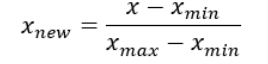

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

In [29]:
df_scaled=copy.deepcopy(new_df)

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,10.000,5.00
Apple,5.000,7.50
Banana,8.125,6.25
Grape,8.750,10.00


#### Standard Scaler

- The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution is centered around 0, with a standard deviation of 1.

- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.

- If data is not normally distributed, this is not the best Scaler to use.

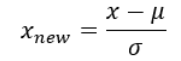

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,1.102646,-1.183216
Apple,-1.611559,0.169031
Banana,0.084819,-0.507093
Grape,0.424094,1.521278


In [31]:
#check the mean and standard deviation of both the columns
#the values are not exactly, but very close to 0(same with standard deviation). 
#This occurs due to the numerical precision of floating-point numbers in Python.
df_scaled.describe()

,Weight,Price
count,4.000000e+00,4.000000
mean,-4.163336e-17,0.000000
std,1.154701e+00,1.154701
min,-1.611559e+00,-1.183216
25%,-3.392756e-01,-0.676123
50%,2.544567e-01,-0.169031
75%,5.937323e-01,0.507093
max,1.102646e+00,1.521278


#### MaxAbsScaler

- Scale each feature/column by its maximum absolute value. It takes the absolute maximum value of each column and divides each value in the column by the maximum value.

- This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0. It does not shift/center the data and thus does not destroy any sparsity.

- On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.

In [32]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,1.000000,0.2
Apple,0.652174,0.6
Banana,0.869565,0.4
Grape,0.913043,1.0


#### Robust Scaler 

- This Scaler is robust(not sensitive) to outliers. If our data contains many outliers, scaling using the mean and standard deviation 
of the data won’t work well.

- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). 

- The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

In [33]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,0.909091,-0.857143
Apple,-2.000000,0.285714
Banana,-0.181818,-0.285714
Grape,0.181818,1.428571


#### Quantile Transformer Scaler

- Transform features using quantiles information.

- Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly.This method transforms the features to follow a uniform or a normal distribution. Since it makes the variable normally distributed, it also deals with the outliers. For a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.

- The cumulative distribution function of a feature is used to project the original values. It computes the cumulative distribution function of the variable, uses this cdf to map the values to a normal distribution and Maps the obtained values to the desired output distribution using the associated quantile function

- Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. Thus, it is best to use this for non-linear data. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as Rank scaler.

In [34]:
from sklearn.preprocessing import QuantileTransformer
n_samples = 4
scaler = QuantileTransformer(n_quantiles=n_samples)

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,1.000000,0.000000
Apple,0.000000,0.666667
Banana,0.333333,0.333333
Grape,0.666667,1.000000


#### Log Transform

- The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

- Why does it work? It is because the log function is equipped to deal with large numbers. 

- A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

In [35]:
df_scaled = copy.deepcopy(new_df)
df_scaled['Weight']=np.log(df_scaled['Weight'])
df_scaled['Price']= np.log(df_scaled['Price'])
df_scaled

,Weight,Price
Fruit,,
Orange,3.135494,0.000000
Apple,2.708050,1.098612
Banana,2.995732,0.693147
Grape,3.044522,1.609438


#### Power Transformer Scaler

- The power transformer is a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
- This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired. It changes the distribution of the variable, as in, it makes it more Gaussian(normal). 
- Power transforms such as square root, and cube root, and log transforms have similar features, However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda. Currently, Sklearn implementation of PowerTransformer supports the Box-Cox transform(works with oly +ve values) and the Yeo-Johnson transform(works with both +ve and -ve values).
- The power transform finds the optimal scaling factor in stabilizing variance and minimizing skewness through maximum likelihood estimation. 
-  The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. 

In [36]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,1.300673,-1.390448
Apple,-1.485161,0.371063
Banana,-0.114552,-0.329770
Grape,0.299040,1.349155


#### Unit Vector Scaler/Normalizer
    
- Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

- Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data. However, there is a difference in the way it does so.

    - If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
    - If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

- Normalization is done considering the whole feature vector to be of unit length. This usually means dividing each component by the Euclidean length of the vector (L2 Norm). In some applications (e.g., histogram features), it can be more practical to use the L1 norm of the feature vector.

- Like Min-Max Scaling, the Unit Vector technique produces values of range [0,1]. When dealing with features with hard boundaries, this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.

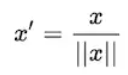

In [37]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l2')

df_scaled[cols] = scaler.fit_transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,0.999056,0.043437
Apple,0.980581,0.196116
Banana,0.995037,0.099504
Grape,0.972806,0.231621


#### Custom Transformer


- If we want to use own Python function to transform the data, Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

- We can have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

- We can now apply the FunctionTransformer.

In [38]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log2, validate = True)

df_scaled[cols] = transformer.transform(features.values)
df_scaled

,Weight,Price
Fruit,,
Orange,4.523562,0.000000
Apple,3.906891,1.584963
Banana,4.321928,1.000000
Grape,4.392317,2.321928


#### Conclusion 

We studied that some scalers are sensitive to outliers, while others were robust. We also understand how some scalers change the underlying distribution of the data itself.

Each feature scaling technique has its own characteristics which we can leverage to improve our model. However, just like other steps in building a predictive model, choosing the right scaler is also a trial and error process, and there is no single best scaler that works every time. A general best practices list for feature scaling is as below.

Data-centric best practises, include the following:

1. If our data has outliers, use standardization or robust scaling.

2. If our data has a gaussian distribution, use standardization.

3. If our data has a non-normal distribution, use normalization.

Model-centric rules include these:

1. If our modeling algorithm assumes (but does not require) a normal distribution of the residuals (i.e., regularized linear regression, regularized logistic regression, or linear discriminant analysis), use standardization.

2. If our modeling algorithm makes no assumptions about the distribution of the data (i.e., k-nearest neighbors, support vector machines, and artificial neural networks), then use normalization.